# Introduction Statement

**Early Warning Indicators (EWI)**

EWI are data points that district and school staff use to determine which students are at-risk for dropping out. Most of the EWIs are measured at the end of each term (each quarter, semester, or trimester). Students are flagged with an EWI if they meet certain risk thresholds. EWIs fall into one of four categories: attendance, behavior, course performance, and incoming risk: 

*   The attendance EWI cutoff for at-risk is absent from 10 percent of instructional days. 
*   The behavior EWI cutoff for at-risk is suspended or expelled for any length of time. 
*   The course performance EWI cutoff for at-risk is failing at least one core course or a GPA under 2.0. 
*   The incoming risk EWI cutoff for at-risk is students with at least one EWI flagged from the previous term. 

In education, the number of Early Warning Indicators (EWI) that constitute at-risk can vary depending on the school, district, or state. However, typically a student is considered at-risk if they meet or exceed a certain number of EWI thresholds.

For example, in some schools or districts, a student may be considered at-risk if they meet two or more EWI thresholds, while in others, the threshold may be three or more. Additionally, some schools or districts may weight different EWI categories differently, such as giving more weight to attendance or behavior than to course performance.

Ultimately, the number of EWI that constitute at-risk is determined based on research and best practices in the field, as well as the specific needs and characteristics of the student population. The goal of using EWI to identify at-risk students is to provide early intervention and support to help these students succeed academically and stay on track to graduate.


**Logistic Regression**

Logistic regression is a statistical method used to analyze relationships between a binary outcome variable and one or more predictor variables. The goal of logistic regression is to model the probability of the outcome variable (e.g., "yes" or "no") as a function of the predictor variables. This is done by fitting a logistic function to the data, which maps the predictor variables to a probability of the outcome variable. Logistic regression is a widely used technique in various fields, including medicine, psychology, and social sciences, to model and predict the likelihood of events such as disease onset, credit default, or customer churn, and to identify the most important predictors of those events.

**Receiver Operating Characteristic (ROC)**

The ROC curve is a graphical representation of the performance of a binary classifier that shows the trade-off between the:
* sensitivity (true positive rate) and the;
* specificity (true negative rate) at various classification thresholds.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various thresholds. The TPR is the proportion of positive instances that are correctly classified as positive, and the FPR is the proportion of negative instances that are incorrectly classified as positive.

The area under the ROC curve (AUC) is a measure of the performance of the binary classifier, with an AUC of 1.0 indicating perfect classification, while an AUC of 0.5 indicates no better than random guessing.

The cutoff point is the threshold that is used to classify instances as positive or negative. For example, in a binary classifier that predicts whether a patient has a disease, the cutoff point could be set at a probability of 0.5, where instances with a predicted probability greater than 0.5 are classified as positive, and those with a predicted probability less than 0.5 are classified as negative.

The choice of the cutoff point depends on the trade-off between the sensitivity and specificity that is desired. If a high sensitivity is desired, the cutoff point can be set lower, so that more instances are classified as positive, even at the cost of higher false positives. Conversely, if a high specificity is desired, the cutoff point can be set higher, so that fewer instances are classified as positive, but with a lower false positive rate. The ROC curve can help in selecting an appropriate cutoff point for a given classifier, based on the desired trade-off between sensitivity and specificity.

# Logistic Regression

In [150]:
# Import the required libraries:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [151]:
# Load the data into a pandas dataframe. The data should contain columns for attendance, behavior, course performance, and a binary variable for dropout.
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the student data into a pandas DataFrame
# student_data = pd.read_csv("student_data.csv")

# Import google drive package  
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('Student_EWI_Data').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
# print(rows)

In [152]:
# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)

# rename to df using the first row as the header
student_data = pd.DataFrame.from_records(rows[1:], columns=rows[0])

# print head of df
student_data.head()

,Student Name,attendance,behavior,course_performance,dropout,,,,,
0,A,26,0,1.9,1,,,,,
1,B,24,1,1.1,1,,,,,
2,C,29,1,1.9,1,,,,,
3,D,26,0,3.2,1,,,,,
4,E,30,1,3.1,0,,,,,


In [153]:
# convert columns to float, except for 'Student Name'
student_data = student_data.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.name != 'Student Name' else x)

In [154]:
# Define the predictor variables and the target variable:
X = student_data[['attendance', 'behavior', 'course_performance']]
y = student_data['dropout']

In [155]:
# Split the data into training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [156]:
# Fit a logistic regression model to the training data:
from sklearn.linear_model import LogisticRegression

# model = classifier object (clf)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

##**Logistic Regression Assumptions**

The logistic regression model, implemented in scikit-learn, is a binary classification algorithm that makes a number of assumptions about the data and the relationship between the features and the target variable. Here are some of the key assumptions of the logistic regression model:
   * The relationship between the features and the target variable is linear. The model assumes that the log-odds of the target variable is a linear function of the features.
   * The residuals are normally distributed. The model assumes that the errors or residuals are normally distributed, with a mean of zero and constant variance.
   * The predictors are independent of each other. The model assumes that the predictors or features are not highly correlated with each other.
   * The target variable is binary. The model assumes that the target variable is binary or dichotomous, taking on only two possible values (e.g., 0 and 1).
   * The observations are independent. The model assumes that the observations in the training data are independent of each other, that is, the value of the target variable for one observation does not affect the value of the target variable for another observation.
   * There is no multicollinearity. The model assumes that there is no multicollinearity between the features or predictors. That is, there is no perfect linear relationship between the features, which can lead to numerical instability in the model.

To test the assumptions of the logistic regression model, you can use a variety of techniques, including visualizations and statistical tests.

**Linear relationship**: To test if there is a linear relationship between the features and the target variable, you can create scatterplots of each feature against the target variable, or use a pairplot to visualize the relationship between all pairs of features and the target variable. You can also use the statsmodels library to fit a linear regression model and check the residuals for linearity. 

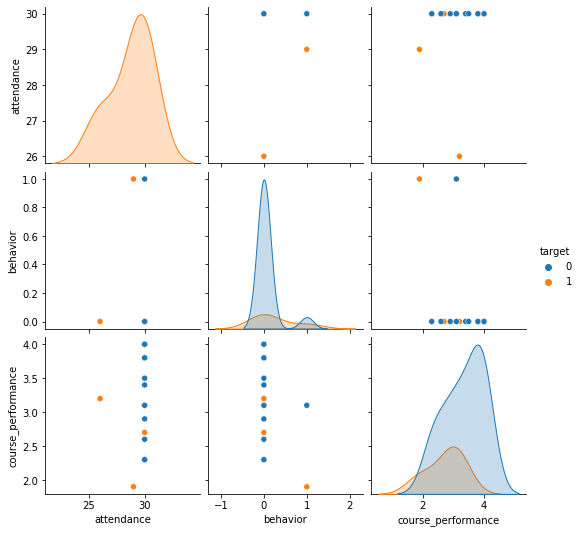

In [134]:
import seaborn as sns

# assume X_train and y_train are already defined
df_train = X_train.copy()
df_train['target'] = y_train
sns.pairplot(df_train, hue='target')

**Normality of residuals**: To test if the residuals are normally distributed, you can create a histogram of the residuals or use a Q-Q plot to compare the residuals to a normal distribution. You can also use the statsmodels library to fit a linear regression model and check the normality of the residuals using the Jarque-Bera test. 

(array([16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

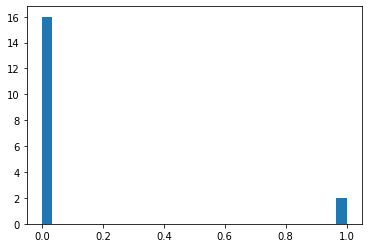

In [135]:
import matplotlib.pyplot as plt

# logistic regression model fitted to X_train and y_train
y_pred = model.predict(X_train)
residuals = y_train - y_pred
plt.hist(residuals, bins=30)

**Independence of predictors**: To test if the predictors are independent of each other, you can create a correlation matrix of the features and check for high correlations. You can also use the Variance Inflation Factor (VIF) to quantify the amount of multicollinearity in the model.
* The Variance Inflation Factor (VIF) is a measure of multicollinearity in a regression model. It quantifies the degree to which the variance of the estimated coefficients is increased due to correlation among the predictor variables.

* A VIF score of 1 indicates that there is no correlation among the predictor variables, while a score of 5 or above indicates that there is a strong degree of multicollinearity among the predictors.

* In general, high VIF scores suggest that the predictors in the model are strongly correlated with each other, which can lead to unreliable coefficient estimates and reduce the overall predictive power of the model. When the VIF scores are high, it may be necessary to remove some of the predictors from the model or to transform the data in some way to reduce the correlation among the predictors.

* It's worth noting that the interpretation of VIF scores can be somewhat subjective, and there is no strict rule for what constitutes a "high" VIF score. In practice, a score of 5 or above is often used as a threshold for identifying problematic multicollinearity, but the appropriate threshold may vary depending on the specific context and goals of the analysis.

* Overall, the VIF is a useful tool for assessing the degree of multicollinearity in a regression model, but it should be used in conjunction with other diagnostic tools and subject-matter expertise to make informed decisions about how to modify or improve the model.

In [136]:
import statsmodels.api as sm

# correlation matrix
X_train_constant = sm.add_constant(X_train)
corr_matrix = X_train.corr()

corr_matrix

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,attendance,behavior,course_performance
attendance,1.000000,-0.084365,0.123125
behavior,-0.084365,1.000000,-0.387758
course_performance,0.123125,-0.387758,1.000000


In [137]:
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oi
import pandas as pd

# correlation matrix
X_train_constant = sm.add_constant(X_train)
corr_matrix = X_train.corr()

# VIF
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_constant)
results = model.fit()
# compute VIF for each predictor
vif = pd.DataFrame(list(zip(X_train.columns, [oi.variance_inflation_factor(X_train_constant.values, i) for i in range(X_train_constant.shape[1])])), 
                   columns=["features", "VIF"])
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,features,VIF
0,attendance,1034.749449
1,behavior,1.017023
2,course_performance,1.178853


**Binary target variable**: To test if the target variable is binary, you can create a histogram or bar chart of the target variable and check that it takes on only two values. 

Text(0, 0.5, 'Count')

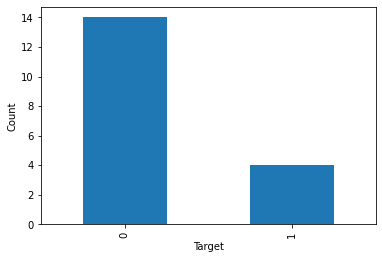

In [138]:
import matplotlib.pyplot as plt

# assume y_train is a Pandas Series
y_train.value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')

**Independence of observations**: To test if the observations are independent, you can create a scatterplot of each feature against the row index and check for patterns or trends. You can also use a time series analysis to check for autocorrelation in the residuals. 

Text(0, 0.5, 'Feature')

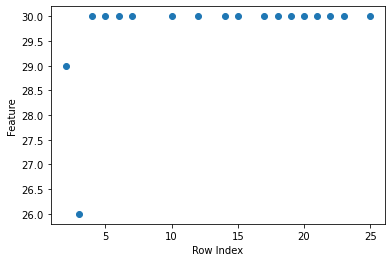

In [139]:
import matplotlib.pyplot as plt

# scatter plot
plt.scatter(X_train.index, X_train['attendance'])
plt.xlabel('Row Index')
plt.ylabel('Feature')

Text(0, 0.5, 'Feature')

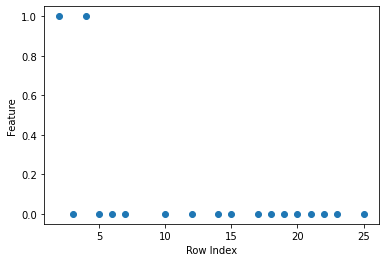

In [140]:
import matplotlib.pyplot as plt

# scatter plot
plt.scatter(X_train.index, X_train['behavior'])
plt.xlabel('Row Index')
plt.ylabel('Feature')

Text(0, 0.5, 'Feature')

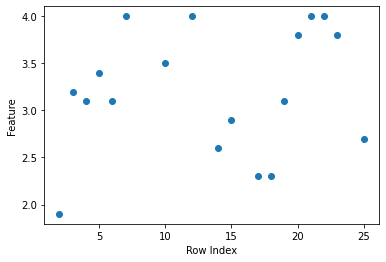

In [141]:
import matplotlib.pyplot as plt

# scatter plot
plt.scatter(X_train.index, X_train['course_performance'])
plt.xlabel('Row Index')
plt.ylabel('Feature')

# Test prediction model using ROC/AUC 

In [157]:
# Use the model to make predictions on the testing data and calculate the predicted probabilities:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [158]:
# Compute y_pred using a threshold of 0.3
# y_pred = (y_pred_proba >= 0.3).astype(int)

In [159]:
# The roc_curve function assumes that the target variable y_test is a binary variable that takes values of 0 or 1, not strings "0" and "1".
y_test = y_test.astype(int)

# Calculate the FPR, TPR, and thresholds using the roc_curve() function:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [160]:
# Calculate the area under the curve (AUC) using the auc() function:
roc_auc = auc(fpr, tpr)

In [161]:
# Add the AUC value to a dataframe
df = pd.DataFrame({'Model': ['Logistic Regression'], 'AUC': [roc_auc]})
df

,Model,AUC
0,Logistic Regression,0.933333


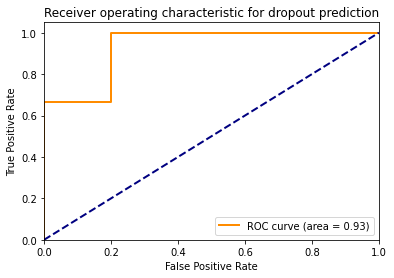

In [162]:
# Plot the ROC curve:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for dropout prediction')
plt.legend(loc="lower right")
plt.show()

In [163]:
# Create a new dataframe with the predicted values and probabilities
predictions_df = pd.DataFrame({'dropout_prediction': y_test, 'dropout_probability': y_pred_proba})

# Concatenate the original dataframe with the new predictions dataframe
df_with_predictions = pd.concat([student_data, predictions_df], axis=1)

In [164]:
df_with_predictions.head(30)

,Student Name,attendance,behavior,course_performance,dropout,,,,,,dropout_prediction,dropout_probability
0,A,26,0,1.9,1,NaN,NaN,NaN,NaN,NaN,1.0,0.949075
1,B,24,1,1.1,1,NaN,NaN,NaN,NaN,NaN,1.0,0.996134
2,C,29,1,1.9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,26,0,3.2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,30,1,3.1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,F,30,0,3.4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,G,30,0,3.1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H,30,0,4.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,I,30,0,4.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.090729
9,J,30,0,3.7,0,NaN,NaN,NaN,NaN,NaN,0.0,0.111538


# Apply classifier and test

In [165]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the student data into a pandas DataFrame
# student_data = pd.read_csv("student_data.csv")

# Import google drive package  
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('Student_EWI_Data2').sheet1
# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
# print(rows)

# create new data frame
# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)

# rename to df using the first row as the header
student_data2 = pd.DataFrame.from_records(rows[1:], columns=rows[0])

# print head of df
student_data2.tail()

,Student Name,attendance,behavior,course_performance,dropout,,,,,
21,V,30,0,4,0,,,,,
22,W,30,0,4,0,,,,,
23,X,30,0,3.8,0,,,,,
24,Y,30,0,3.9,0,,,,,
25,Z,30,0,2.7,1,,,,,


In [166]:
# drop columns with empty header
student_data2 = student_data2.drop(columns=[''])

In [167]:
# convert empty strings to NaN
student_data2 = student_data2.replace('', pd.NaT)

In [168]:
columns_list = student_data2.columns.tolist()
print(columns_list)

['Student Name', 'attendance', 'behavior', 'course_performance', 'dropout']


In [169]:
# preprocess the new data
# new_data = preprocess(new_df)
new_data = student_data2

# convert empty strings to NaN
new_data = new_data.replace('', pd.NaT)

# convert columns to float
# new_data = new_data.apply(pd.to_numeric, errors='coerce')

# convert columns to float, except for 'Student Name'
new_data = new_data.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.name != 'Student Name' else x)

In [170]:
new_data.dtypes

Student Name           object
attendance              int64
behavior                int64
course_performance    float64
dropout                 int64
dtype: object

In [171]:
# if 'Student Name' in new_data.columns:
#     new_data.set_index('Student Name', inplace=True)

# drop column
student_name = new_data.pop('Student Name')

# drop the ID column if it exists
if 'dropout' in new_data.columns:
    new_data.drop('dropout', axis=1, inplace=True)

# make predictions using the trained logistic regression model
y_pred = model.predict(new_data)
y_pred_proba = model.predict_proba(new_data)[:, 1]

# 'dropout_prediction': y_test, 'dropout_probability': y_pred_proba

# create a new dataframe with the predictions and probabilities
predictions_df = pd.DataFrame({'dropout_prediction': y_pred, 'dropout_probability': y_pred_proba})

# concatenate the new dataframe with the original dataframe
df_with_predictions = pd.concat([new_data, predictions_df], axis=1)

# add back 'Student Name' column
df_with_predictions.insert(0, 'Student Name', student_name)

# print
df_with_predictions

,Student Name,attendance,behavior,course_performance,dropout_prediction,dropout_probability
0,A,26,0,1.9,1,0.949075
1,B,24,1,1.1,1,0.996134
2,C,29,1,1.9,1,0.601370
3,D,26,0,3.2,1,0.873253
4,E,30,1,3.1,0,0.195763
5,F,30,0,3.4,0,0.136404
6,G,30,0,3.1,0,0.165779
7,H,30,0,4.0,0,0.090729
8,I,30,0,4.0,0,0.090729
9,J,30,0,3.7,0,0.111538
